In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pylab import rcParams

%matplotlib inline

sns.set_style('white')

rcParams['figure.figsize']= 12,10

In [2]:
img = cv2.imread(filename='capo.jpg',flags =cv2.IMREAD_COLOR)

In [4]:
img.shape #esto te muestra el tama;o y el tipo de color que tiene, si pones solo img te mostrara la cadena de arrays que componen tu imagen

(1560, 1170, 3)

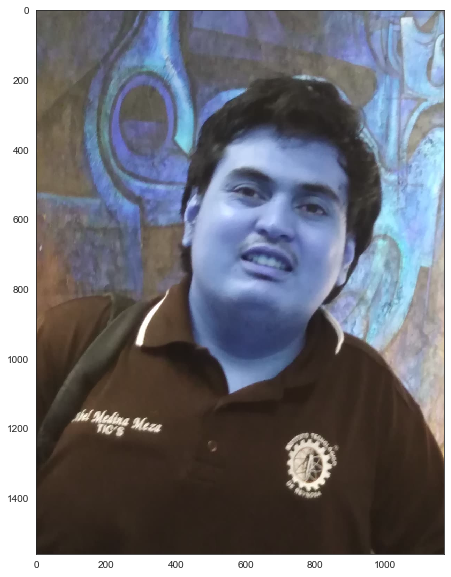

In [5]:
plt.imshow(img) #esto te muestra tu imagen pero con una gana de colores diferente.

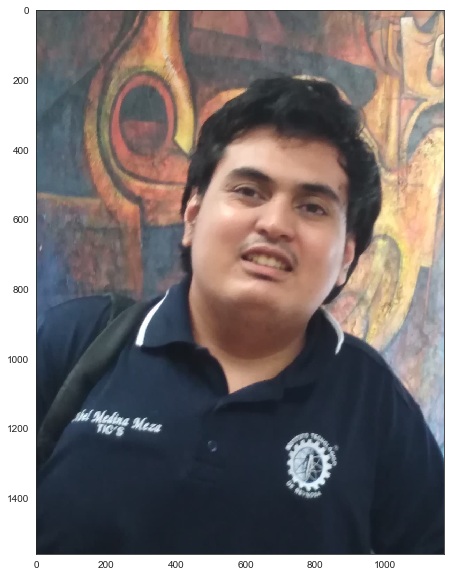

In [6]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #si agregamos COLOR_BGR2RGB podemos dar el color correco de nuestra imagen

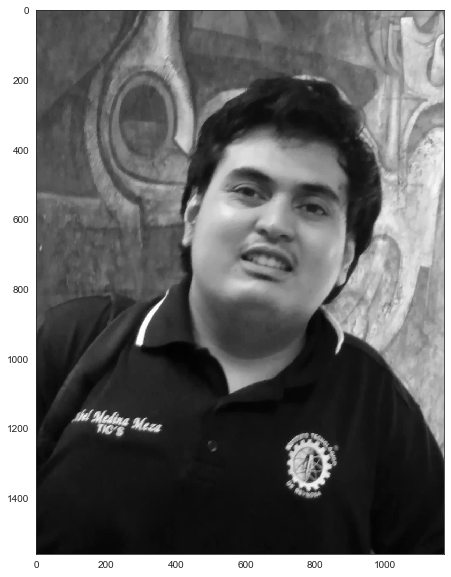

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray') #con esto ahora cambiaremos la forma en que se vera nuestra imagen.

In [9]:
cv2.imwrite('mezajoto.jpg', gray) #este comando es para guardar el cambio hecho en la imagen

True

In [17]:
def show_image(image, show_axis = True):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if not show_axis:
        plt.axis('off');




w,h = 128, 80
resized = cv2.resize(img, (w, h)) #estos comandos nos dan un redise;o de nuestra imagen actual

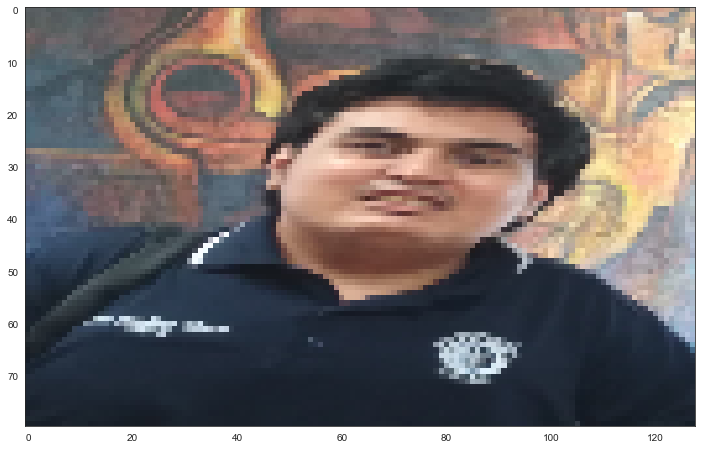

In [18]:
show_image(resized)

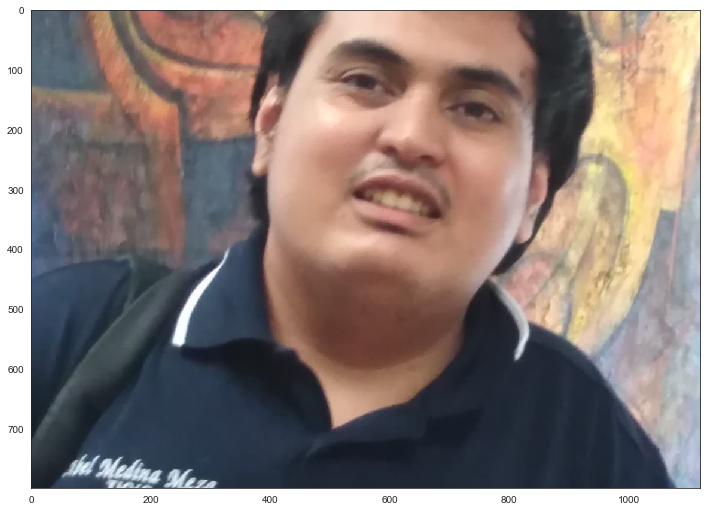

In [21]:
cropped = img[400:1200, 50:1300]
show_image(cropped)

In [24]:
def rotate_bound(image, angle):
   # agarramos la dimension de la imagen y entonces determinamos el centro
    (h,w) = image.shape[:2]
    (cX, CY) = (w // 2, h // 2)
    
    #agarramos el matriz de rotacion(aplicando lo negativo del angulo para las agujas del reloj)
    #entonces agarramos el seno y coseno
    M= cv2.getRotationMatrix2D((cX, CY), -angle, 1.0)
    cos = np.abs(M[0,0])
    sin = np.abs(M[0,1])
    #computamos el nuevo delimitador de dimensiones de la imagen
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
    #ajustamos la matriz de rotacion para que tome en cuenta la traduccion
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - CY
    #ejecutamos la rotacion actual y regremos la imagen
    return cv2.warpAffine(image, M, (nW, nH))


    

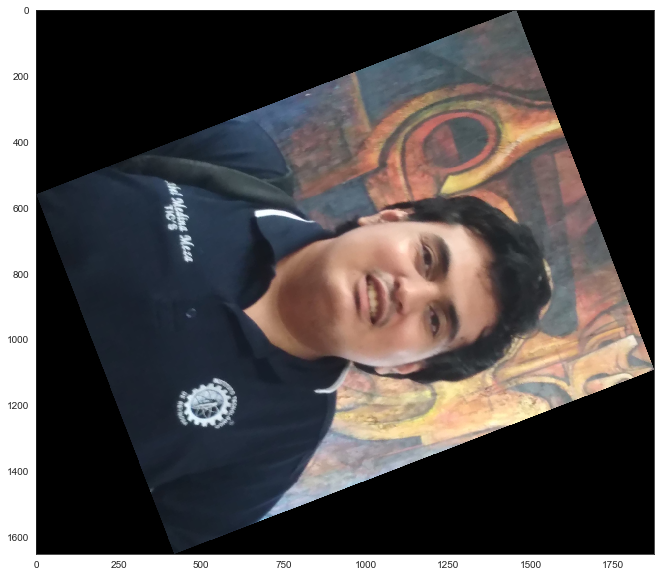

In [27]:
show_image(rotate_bound(img,69))